# Stroken Prediction 

### Contexto: 

De acordo com a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte globalmente, sendo responsável por aproximadamente 11% do total de mortes. Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um AVC com base em parâmetros de entrada, como gênero, idade, várias doenças e status de tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

### Informações sobre atributos:
1) __id__: identificador único
2) __gênero__: "Masculino", "Feminino" ou "Outro"
3) __idade__: idade do paciente
4) __hipertensão__: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
5) __doença cardíaca__: 0 se o paciente não tiver doença cardíaca, 1 se o paciente tiver doença cardíaca
6) __já casado__: "Não" ou "Sim"
7) __tipo de trabalho__: "crianças"(`children`), "Funcionário público"(`Govt_jov`), "Nunca trabalhou"(`Never_worked`), "Privado"(`Private`) ou "Autônomo"(`Self-employed`)
8) __tipo de residência__: "Rural" ou "Urbana"
9) __nível médio de glicose__: nível médio de glicose no sangue
10) __IMC__: índice de massa corporal
11) __status de tabagismo__: "ex-fumante"(`formerly smoked`), "nunca fumou"(`formerly smoked`), "fuma"(`smokes`) ou "Desconhecido"(`Unknown`)
12) __AVC__: 1 se o paciente teve um AVC ou 0 se não teve

> Nota: "Desconhecido" em status de tabagismo significa que as informações não estão disponíveis para este paciente.

In [13]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [14]:
data =  pd.read_csv(r'datasets/StrokePredictionDataset/healthcare-dataset-stroke-data.csv',sep=',')

In [15]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Analise dos dados

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Removendo valores `NULL` | `NAN` no meu conjunto de dados

In [20]:
data.dropna(inplace= True)

In [24]:
for nameColumn in data.columns:
    selecao = data[nameColumn].loc[ data[nameColumn].isna() == True ]
    if len(selecao) != 0 : print(f'na coluna {nameColumn} tem valores NULL | NaN')

### tipo de tabalho

In [38]:
data['work_type'].value_counts().reset_index(name='quantidade')

,work_type,quantidade
0,Private,2810
1,Self-employed,775
2,children,671
3,Govt_job,630
4,Never_worked,22


### Por genero

In [33]:
data['gender'].value_counts().reset_index(name='quantidade')

,gender,quantidade
0,Female,2897
1,Male,2011
2,Other,1


devido `other` possui dado insuficiente será retirado da tabela 

In [35]:
data.drop(
    index   = (
        data.loc[data['gender'] == 'Other'].index
    ),
    inplace = True 
)

In [36]:
data['gender'].value_counts().reset_index(name='quantidade')

,gender,quantidade
0,Female,2897
1,Male,2011


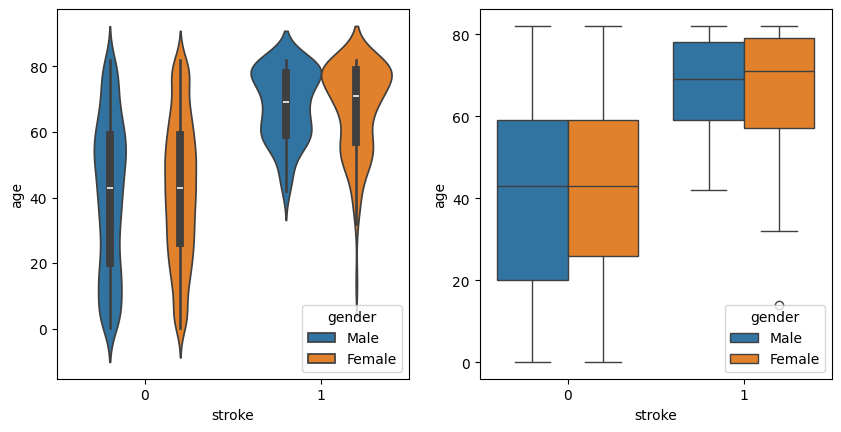

In [53]:
fig ,ax = plt.subplots(1,2)
fig.set_figwidth(10)

sea.violinplot(
    data,
    x = data['stroke'],
    y = data['age']   ,
    hue= data['gender'],
    ax = ax[0]
)

sea.boxplot(
    x = data['stroke'],
    y = data['age']   ,
    hue= data['gender'],
    ax = ax[1]
)

plt.show()

In [65]:
meanYearStroke = data.groupby(by=['gender','stroke'])['age'].mean().reset_index(name='mean')

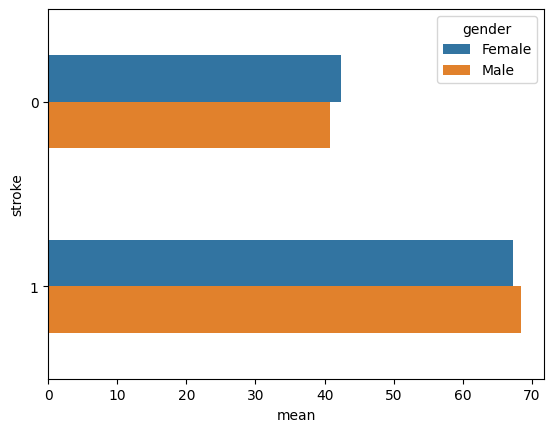

In [74]:
sea.barplot(
    meanYearStroke,
    x = meanYearStroke['mean'],
    y = meanYearStroke['stroke'],
    hue =meanYearStroke['gender'],
    orient='h',
    width=0.5
)

plt.show()